### Include Functions, Load Data and set Gamma and Cost Hyperparameters

Setting hyperparameters at the top of the file gives you a way to find them and change them in a single place.

Iris is a classical dataset for doing classification.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris() # Load the iris dataset

# convert to a dataframe
tdf = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

tdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Separate into data and target

In [2]:
# Separate Features from Target
X = tdf.iloc[:, 0:4]   # load features into X DF
Y = tdf.iloc[:, 4]     # Load target into Y DF

## Split the data into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

## Set the hyperparameters 
Having this in one location enables finding them more easily

In [4]:
cost = .9 # penalty parameter of the error term
gamma = 5 # defines the influence of input vectors on the margins

### Try Kernels
I'm creating a for loop so that I can test multiple kernels: polynomial, radial basis function and linear kernels against a linearSVC

In [5]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test a LinearSVC
clf1 = svm.LinearSVC(C=cost).fit(X_train, y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))

# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))

LinearSVC
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.73      0.89      0.80         9
         2.0       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30

linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.82      0.90      0.86        10
         2.0       0.91      0.83      0.87        12


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Plot Different Kernels with 2 Features
In order to simplify the data visualization, I'm using only 2 features at a time. We can see because of the use of cost and gamma we've made the margins soft. 

First we'll plot features 1 and 2 and visualize the results.

In [6]:
# Reload iris data
(data, target) = load_iris(return_X_y =True)

import matplotlib.pyplot as plt

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


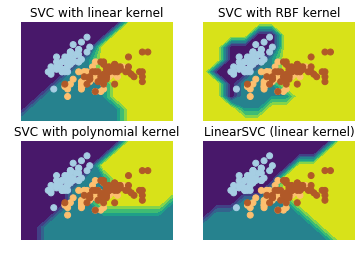

In [7]:
# To make plotting easier, let's just use two features.
X = data[:,:2]
Y = target

h = .5  # step size in the mesh
#cost = .9  # update the cost
#gamma = 10 # update the gamma 

# testing other kernels on unscaled data (for plotting tht support vectors)
svc = svm.SVC(kernel='linear', C=cost).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', gamma=gamma, degree=3, C=cost).fit(X, Y)
lin_svc = svm.LinearSVC(C=cost).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel',
          'LinearSVC (linear kernel)']

for i, kernel in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.axis('off')
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.show()

Features one and two are not very good at creating separation

Let's try features 2 and 3 and plot the results

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


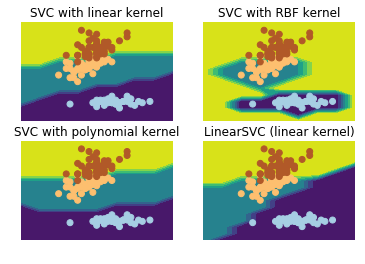

In [8]:
X1 = data[:, 1:3]

# testing other kernels on unscaled data (for plotting tht support vectors)
svc1 = svm.SVC(kernel='linear', C=cost).fit(X1, Y)
rbf_svc1 = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X1, Y)
poly_svc1 = svm.SVC(kernel='poly', degree=3, C=cost).fit(X1, Y)
lin_svc1 = svm.LinearSVC(C=cost).fit(X1, Y)

x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y1_min, y1_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(y1_min, y1_max, h))

for i, kernel1 in enumerate((svc1, rbf_svc1, poly_svc1, lin_svc1)):
    plt.subplot(2, 2, i + 1)
    Z1 = kernel1.predict(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    plt.contourf(xx1, yy1, Z1)
    plt.axis('off')
    plt.scatter(X1[:, 0], X1[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.show()

Features 2 and 3 are better than features 1 and 2. But how will they compare with 3 and 4?

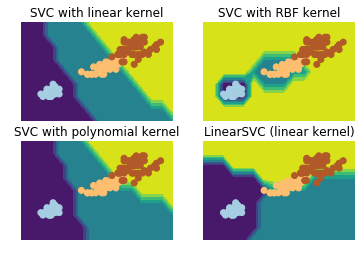

In [9]:
X2 = data[:, 2:4]

# testing other kernels on unscaled data (for plotting tht support vectors)
svc2 = svm.SVC(kernel='linear', C=cost).fit(X2, Y)
rbf_svc2 = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X2, Y)
poly_svc2 = svm.SVC(kernel='poly', C=cost).fit(X2, Y)
lin_svc2 = svm.LinearSVC(C=cost).fit(X2, Y)

x2_min, x2_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y2_min, y2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h),
                     np.arange(y2_min, y2_max, h))

for i, kernel2 in enumerate((svc2, rbf_svc2, poly_svc2, lin_svc2)):
    plt.subplot(2, 2, i + 1)
    Z2 = kernel2.predict(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    plt.contourf(xx2, yy2, Z2)
    plt.axis('off')
    plt.scatter(X2[:, 0], X2[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.show()

These look even better--but all of them is best!